# Question 1: Supervised Learning for Bioprinting

**Background**: Bioprinting uses additive manufacturing to create three-dimensional structures containing living cells, enabling controlled in vitro experiments that better mimic the tumour microenvironment. Certain printing parameters, such as extrusion pressure and nozzle diameter, can substantially reduce post-printing cell viability. Recent work has shown that supervised machine learning models can predict printing outcomes, including cell viability, from printer and bioink parameters. In *Machine Assisted Experimentation of Extrusion-Based Bioprinting Systems*, Tian et al. compiled a multi-laboratory dataset of 617 cell viability measurements and applied several ML models to predict printing outcomes.

**Objective**: In this question, you will partially reproduce and extend the supervised learning analysis of Tian et al. You will preprocess the experimental dataset and train two classification models to
predict whether a given set of bioprinting parameters results in acceptable cell viability (Yes/No). Assume that cell viability is considered acceptable if it exceeds the threshold defined in the paper.

### (1a) Written Long Answer

##### 1. Define and explain precision and recall in the context of binary classification. Provide and explain the formula for each metric.

- Precision is a metric that measures the accuracy of positive predictions ("Of the positive predictions, how many were correctly positive?")

        Precision = TP / (TP + FP), where TP is the amount of true positives and FP is the amount of false positives
- Recall is a metric that measures the model's ability to correctly classify positives ("How many positive predictions were correctly labelled?")

        Recall = TP / (TP + FN), where TP is the amount of true positives and FN is the amount of false negatives

##### 2. Why can accuracy alone be misleading when evaluating classification models? Explain why precision and recall are important complementary metrics, and give a concrete example.

Accuracy alone can be misleading when one class appears infrequently. For example, for a dataset where class A appears 1% of the time, we can apply a model that predicts class B 100% of the time. This would result in an accuracy of 100%, but of course this model is effectively useless. This is why precision and recall are important metrics to use as they tell you about false positives and false negatives. For example, a model may want to avoid false negatives as much as possible, like in bank fraud prediction, as the consequence of a false negative is extremely dire.

### (1b) Data Preprocessing

In [2]:
import pandas as pd

ds = pd.read_csv("Cell viability and extrusion dataset V1.csv")
ds.head()

,Reference,DOI,Final_Alginate_Conc_(%w/v),Final_Gelatin_Conc_(%w/v),Final_GelMA_Conc_(%w/v),Final_Hyaluronic_Acid_Conc_(%w/v),Final_MeHA_Conc_(%w/v),Final_NorHA_Conc_(%w/v),Final_Fibroin/Fibrinogen_Conc_(%w/v),Final_P127_Conc_(%w/v),...,Saline_Solution_Used?,EtOH_Solution_Used?,Photoinitiator_Used?,Enzymatic_Crosslinker_Used?,Matrigel_Used?,Conical_or_Straight_Nozzle,Primary/Not_Primary,Viability_at_time_of_observation_(%),Acceptable_Viability_(Yes/No),Acceptable_Pressure_(Yes/No)
0,Fedorovich et. al. 2008,10.1089/ten.a.2007.0158,2.0,0.0,0.0,0.0,0,0,0.0,0,...,N,N,N,N,N,S,Primary,96.0,Y,Y
1,Fedorovich et. al. 2008,10.1089/ten.a.2007.0158,2.0,0.0,0.0,0.0,0,0,0.0,0,...,N,N,N,N,N,S,Primary,72.0,N,N
2,Fedorovich et. al. 2008,10.1089/ten.a.2007.0158,2.0,0.0,0.0,0.0,0,0,0.0,0,...,N,N,N,N,N,S,Primary,80.0,Y,Y
3,Fedorovich et. al. 2008,10.1089/ten.a.2007.0158,0.0,0.0,0.0,0.0,0,0,0.0,0,...,N,N,N,N,N,S,Primary,96.0,Y,Y
4,Fedorovich et. al. 2008,10.1089/ten.a.2007.0158,0.0,0.0,0.0,0.0,0,0,0.0,0,...,N,N,N,N,N,S,Primary,77.0,N,N


In [3]:
print(ds.columns)

Index(['Reference', 'DOI', 'Final_Alginate_Conc_(%w/v)',
       'Final_Gelatin_Conc_(%w/v)', 'Final_GelMA_Conc_(%w/v)',
       'Final_Hyaluronic_Acid_Conc_(%w/v)', 'Final_MeHA_Conc_(%w/v)',
       'Final_NorHA_Conc_(%w/v)', 'Final_Fibroin/Fibrinogen_Conc_(%w/v)',
       'Final_P127_Conc_(%w/v)', 'Final_Collagen_Conc_(%w/v)',
       'Final_Chitosan_Conc_(%w/v)', 'Final_CS-AEMA_Conc_(%w/v)',
       'Final_TCP_Conc_(%w/v)', 'Final_Gellan_Conc_(%w/v)',
       'Final_Nano/Methycellulose_Conc_(%w/v)', 'Final_PEGTA_Conc_(%w/v)',
       'Final_PEGMA_Conc_(%w/v)', 'Final_PEGDA_Conc_(%w/v)',
       'Final_Agarose_Conc_(%w/v)', 'CaCl2_Conc_(mM)', 'NaCl2_Conc_(mM)',
       'BaCl2_Conc_(mM)', 'SrCl2_Conc_(mM)',
       'Physical_Crosslinking_Durantion_(s)', 'Photocrosslinking_Duration_(s)',
       'Extrusion_Pressure (kPa)', 'Extrusion_Rate_Lengthwise_(mm/s)',
       'Extrusion_Rate_Volume-wise_(mL/s)', 'Nozzle_Movement_Speed_(mm/s)',
       'Inner_Nozzle_Outer_Diameter_(µm)', 'Outer_Nozzle_Inner_Di

- Handling missing values for bioink temperature as described in the paper

In [4]:
ds["Syringe_Temperature_(°C)"] = ds["Syringe_Temperature_(°C)"].fillna(22)
ds["Substrate_Temperature_(°C)"] = ds["Substrate_Temperature_(°C)"].fillna(22)

- Removing features with more than 50% missing values

In [33]:
ds = ds.dropna(thresh=ds.shape[1] * 0.5)

- Imputing remaining missing values using KNNImputer from scikit-learn

In [6]:
from sklearn.impute import KNNImputer

numeric_cols = ds.select_dtypes(include="number").columns

imputer = KNNImputer(
    n_neighbors = 30
)

ds[numeric_cols] = imputer.fit_transform(ds[numeric_cols])

- Scaling continuous features using MinMaxScaler

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

continuous_cols = ds.select_dtypes(include="number").columns
ds[continuous_cols] = scaler.fit_transform(ds[continuous_cols])

- Removing “Acceptable Pressure” from the feature set

In [9]:
ds = ds.drop("Acceptable_Pressure_(Yes/No)", axis=1)

In [11]:
ds = ds.drop("Reference", axis=1)
ds = ds.drop("DOI", axis=1)

In [ ]:
ds["Fiber_Diameter_(µm)"] = (
    ds["Fiber_Diameter_(µm)"]
    .astype(str)
    .str.extract(r"([-+]?\d*\.?\d+)")
    .astype(float)
)


In [15]:
ds["Cell_Culture_Medium_Used?"] = (
    ds["Cell_Culture_Medium_Used?"]
    .str.strip()
    .str.upper()
    .map({"Y": 1, "N": 0})
)

ds["DI_Water_Used?"] = (
    ds["DI_Water_Used?"]
    .str.strip()
    .str.upper()
    .map({"Y": 1, "N": 0})
)

ds["Precrosslinking_Solution_Used?"] = (
    ds["Precrosslinking_Solution_Used?"]
    .str.strip()
    .str.upper()
    .map({"Y": 1, "N": 0})
)

ds["Saline_Solution_Used?"] = (
    ds["Saline_Solution_Used?"]
    .str.strip()
    .str.upper()
    .map({"Y": 1, "N": 0})
)

ds["EtOH_Solution_Used?"] = (
    ds["EtOH_Solution_Used?"]
    .str.strip()
    .str.upper()
    .map({"Y": 1, "N": 0})
)

ds["Photoinitiator_Used?"] = (
    ds["Photoinitiator_Used?"]
    .str.strip()
    .str.upper()
    .map({"Y": 1, "N": 0})
)

ds["Enzymatic_Crosslinker_Used?"] = (
    ds["Enzymatic_Crosslinker_Used?"]
    .str.strip()
    .str.upper()
    .map({"Y": 1, "N": 0})
)

ds["Matrigel_Used?"] = (
    ds["Matrigel_Used?"]
    .str.strip()
    .str.upper()
    .map({"Y": 1, "N": 0})
)

ds["Conical_or_Straight_Nozzle"] = (
    ds["Conical_or_Straight_Nozzle"]
    .str.strip()
    .str.upper()
    .map({"C": 1, "S": 0})
)

ds["Primary/Not_Primary"] = (
    ds["Primary/Not_Primary"]
    .str.strip()
    .str.upper()
    .map({"Primary": 1, "Not_Primary": 0})
)

### (1c) Decision Tree Classifier

In [31]:
from sklearn import tree
from sklearn.model_selection import train_test_split
X = ds.drop("Acceptable_Viability_(Yes/No)", axis=1)
y = ds["Acceptable_Viability_(Yes/No)"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y
)

dt = tree.DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=20
)
dt = dt.fit(X_train, y_train)

[Text(0.5, 0.75, 'x[42] <= 0.79\ngini = 0.474\nsamples = 431\nvalue = [166, 265]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 166\nvalue = [166, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 265\nvalue = [0, 265]'),
 Text(0.625, 0.5, '  False')]

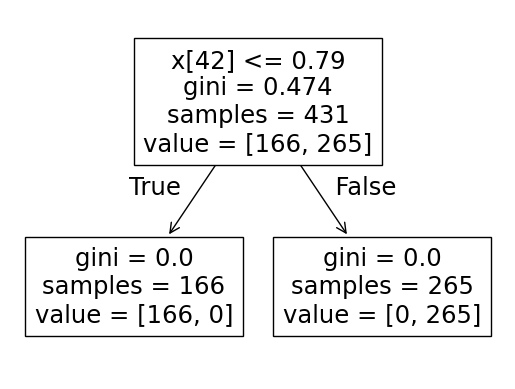

In [32]:
tree.plot_tree(dt)